In [13]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
path = "Train/"
classes = os.listdir(path)
classes = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [15]:
def change_brightness(image, percentage):
    image = image + (percentage*255)
    image = np.clip(image, 0, 255)
    return image.astype(np.uint8)

In [16]:
def rotate_3_times(image):
    img1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img2 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
    img3 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
    
    return img1, img2, img3

In [17]:
def flip_image_h_v(image):
    h = cv2.flip(image, 0)
    v = cv2.flip(image,1)
    return h, v

In [18]:
images = {
    'Ak':[],
    'Ala_Idris':[],
    'Buzgulu':[],
    'Dimnit':[],
    'Nazli':[]
}

In [19]:
for cls in classes:
    folder = path + cls + '/'
    images_ = os.listdir(folder)
    for image in images_:
        full_path = folder+image
        img = cv2.imread(full_path)
        images[cls].append(img)

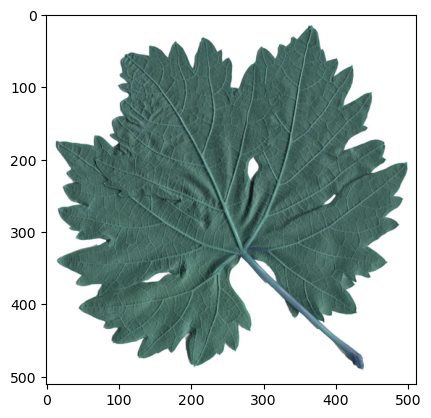

In [20]:
plt.imshow(rotate_3_times(images['Nazli'][1])[0])

In [21]:
i = 0
for cls in classes:
    cur_cls_images = images[cls]
    for img in cur_cls_images:
        # bright = change_brightness(img, 0.1)
        # dark = change_brightness(img, -0.1)
        r1, r2, r3 = rotate_3_times(img)
        f1, f2 = flip_image_h_v(img)
        # path = 'Train/' + cls + "_/"+str(i)+'.png'
        # cv2.imwrite(path, bright)
        # path = 'Train/' + cls + "_/"+str(i+1)+'.png'
        # cv2.imwrite(path, dark)
        path = 'Train_/' + cls + "_/"+str(i+2)+'.png'
        cv2.imwrite(path, r1)
        path = 'Train_/' + cls + "_/"+str(i+3)+'.png'
        cv2.imwrite(path, r2)
        path = 'Train_/' + cls + "_/"+str(i+4)+'.png'
        cv2.imwrite(path, r3)
        path = 'Train_/' + cls + "_/"+str(i+5)+'.png'
        cv2.imwrite(path, f1)
        path = 'Train_/' + cls + "_/"+str(i+6)+'.png'
        cv2.imwrite(path, f2)
        i+=8

In [22]:
path = "Train_/"
classes = ['Ak_', 'Ala_Idris_', 'Buzgulu_', 'Dimnit_', 'Nazli_']

In [23]:
def transparent(path, cls, j):  
    img = Image.open(path) 
    rgba = img.convert("RGBA") 
    datas = rgba.getdata() 
    
    newData = [] 
    for item in datas: 
        if item[0] >= 225 and item[1] >= 225 and item[2] >= 225:  
            newData.append((255, 255, 255, 0)) 
        else: 
            newData.append(item)  
    
    rgba.putdata(newData) 
    rgba.save(f"Train_/{cls}/nn{j}.png", "PNG") 

In [24]:
j = 0
for cls in classes:
    folder = path + cls + '/'
    images_ = os.listdir(folder)
    for image in images_:
        full_path = folder+image
        transparent(full_path, cls, j)
        j+=1